<a href="https://colab.research.google.com/github/firzarfs/MiniProjectFirza/blob/main/3333210080_Muhammad_Firza_Rafsanjani_Kelas_D_Mini_Project_Revisi%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**
The FIFA World Cup is the most prestigious football tournament in the world. The championship has been awarded every four years since the start of the tournament in 1930.

The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams quality for the tournament. In the tournament, 32 teams, including the host nation, compete for the title at different stadiums in the host country.

The reigning champion is France, which beat Croatia in the 2018 tournament in Russia. Qatar will host the 2022 tournament, for which the first match will be played in November.

This dataset provides a complete overview of all international soccer matches played since the 90s. On top of that, the strength of each team is provided by incorporating actual FIFA rankings as well as player strengths based on the EA Sport FIFA video game.

**1.1 Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

The above code is used to import the Pandas library or module into the notebook environment. Pandas is a popular library for processing and analyzing data using Python. This library provides powerful data structures and functions for reading, manipulating and analyzing data

**1.2 Importing Dataset**

In [ ]:
!gdown --id 1dJtVDj0O2652tifGEUoFnncA55f4P4q4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dJtVDj0O2652tifGEUoFnncA55f4P4q4
To: /content/international_matches.csv
100% 3.15M/3.15M [00:00<00:00, 33.6MB/s]


This coding is used to download files on Google Drive

In [ ]:
import pandas as pd
dataset = pd.read_csv('international_matches.csv')
dataset

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


The coding is used to display the csv file. 

## 2. Exploratory Data

In [ ]:
dataset.shape

(23921, 25)

Based on these data, obtained information about 23921 rows and 25 columns.

In [ ]:
dataset.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

provides information about the data types in these datasets which consist of objects, integers, and floats

In [ ]:
dataset.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

provides information about the missing values ​​contained in this dataset and there are missing values, namely in the column home_team_goalkeeper_score, away_team_goalkeeper_score, home_team_mean_defense_score, home_team_mean_offense_score, home_team_mean_offense_score, home_team_mean_midfield_score, away_team_mean_defense_score, away_team_mean_offense_score, away_team_mean_midfield_score

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

provides information about the categories in the column

In [ ]:
dataset.nunique()

date                             5550
home_team                         211
away_team                         211
home_team_continent                 6
away_team_continent                 6
home_team_fifa_rank               211
away_team_fifa_rank               211
home_team_total_fifa_points      1686
away_team_total_fifa_points      1679
home_team_score                    21
away_team_score                    18
tournament                         82
city                             1576
country                           217
neutral_location                    2
shoot_out                           2
home_team_result                    3
home_team_goalkeeper_score         50
away_team_goalkeeper_score         50
home_team_mean_defense_score      127
home_team_mean_offense_score      103
home_team_mean_midfield_score     134
away_team_mean_defense_score      127
away_team_mean_offense_score      103
away_team_mean_midfield_score     134
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

provides information about the missing value and there are several columns that still contain missing value data

In [ ]:
dataset.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

provides information about the data type

In [ ]:
dataset['home_team_goalkeeper_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['away_team_goalkeeper_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['home_team_mean_defense_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['home_team_mean_offense_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['home_team_mean_midfield_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['away_team_mean_defense_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['away_team_mean_defense_score'].dtypes

dtype('float64')

provides information about the data type

In [ ]:
dataset['away_team_mean_defense_score'].dtypes

dtype('float64')

provides information about the data type

Perform imputer to handle missing value in numerical data

eliminating missing values ​​using the mean strategy

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Eliminate datasets that contain missing values in the column

In [ ]:
imputer = imputer.fit(dataset[['home_team_goalkeeper_score', 'away_team_goalkeeper_score']])
imputer

SimpleImputer()

re-checking the missing values ​​in the dataset and there are no missing values ​​in the cleaned column

In [ ]:
dataset[['home_team_goalkeeper_score', 'away_team_goalkeeper_score']] = imputer.transform(dataset[['home_team_goalkeeper_score', 'away_team_goalkeeper_score']])
dataset.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score           0
away_team_goalkeeper_score           0
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

date                           0
home_team                      0
away_team                      0
home_team_continent            0
away_team_continent            0
home_team_fifa_rank            0
away_team_fifa_rank            0
home_team_total_fifa_points    0
away_team_total_fifa_points    0
home_team_score                0
away_team_score                0
tournament                     0
city                           0
country                        0
neutral_location               0
shoot_out                      0
home_team_result               0
home_team_goalkeeper_score     0
away_team_goalkeeper_score     0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [ ]:
dataset = dataset.drop('Date', axis=1)
dataset

KeyError: ignored

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
dataset.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,4.860169,4.785039
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,74.963838,74.212477
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,74.963838,74.212477
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,74.963838,74.212477
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000


using a math plot to visualize n data and there are overlapping data and there are points that are far from the data below and these points are outliers that need to be cleaned

<Axes: >

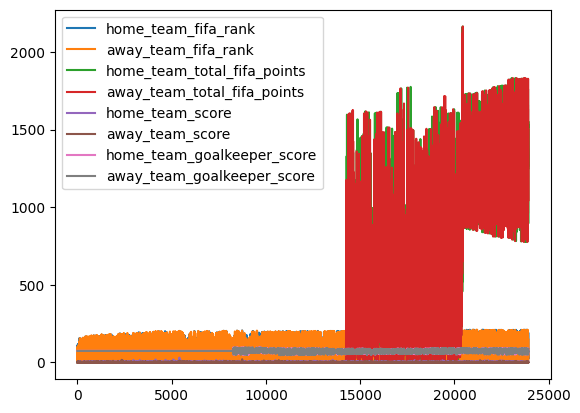

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

using a display, namely boxplot to display outliers data and obtained outliers data, namely value, LowCI, and HighCI

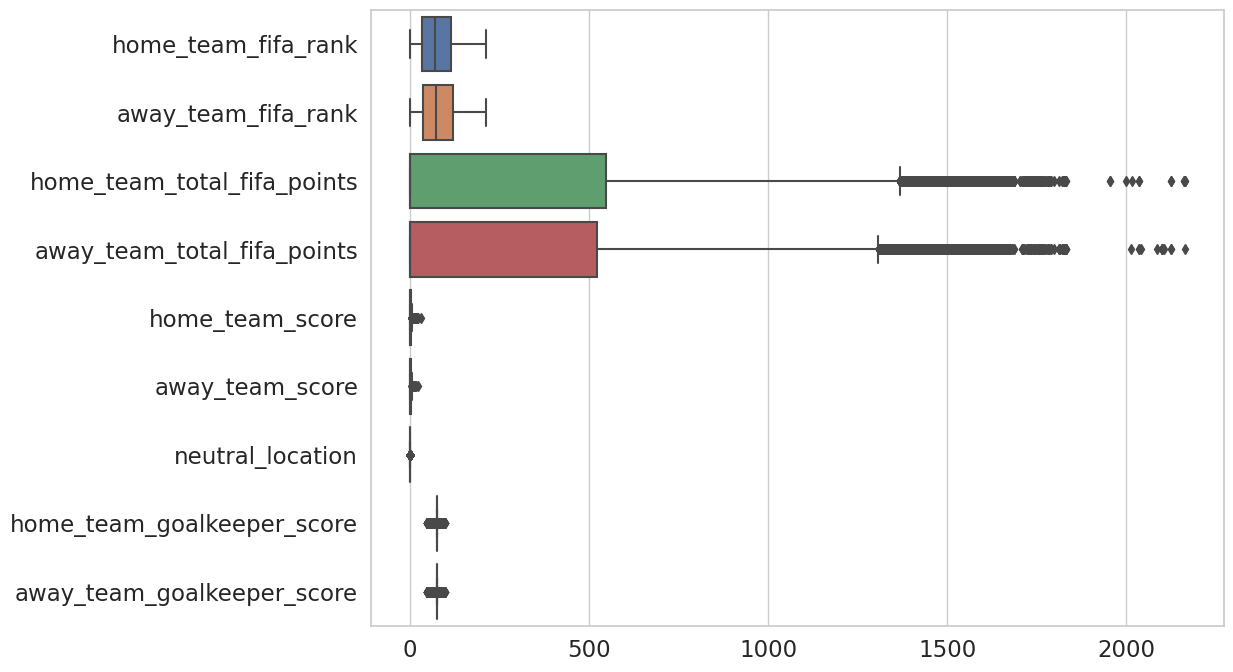

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

using a display, namely Scatter plot to display outliers data and obtained outliers data, namely calories, cal_fat, cholesterol, and sodium.

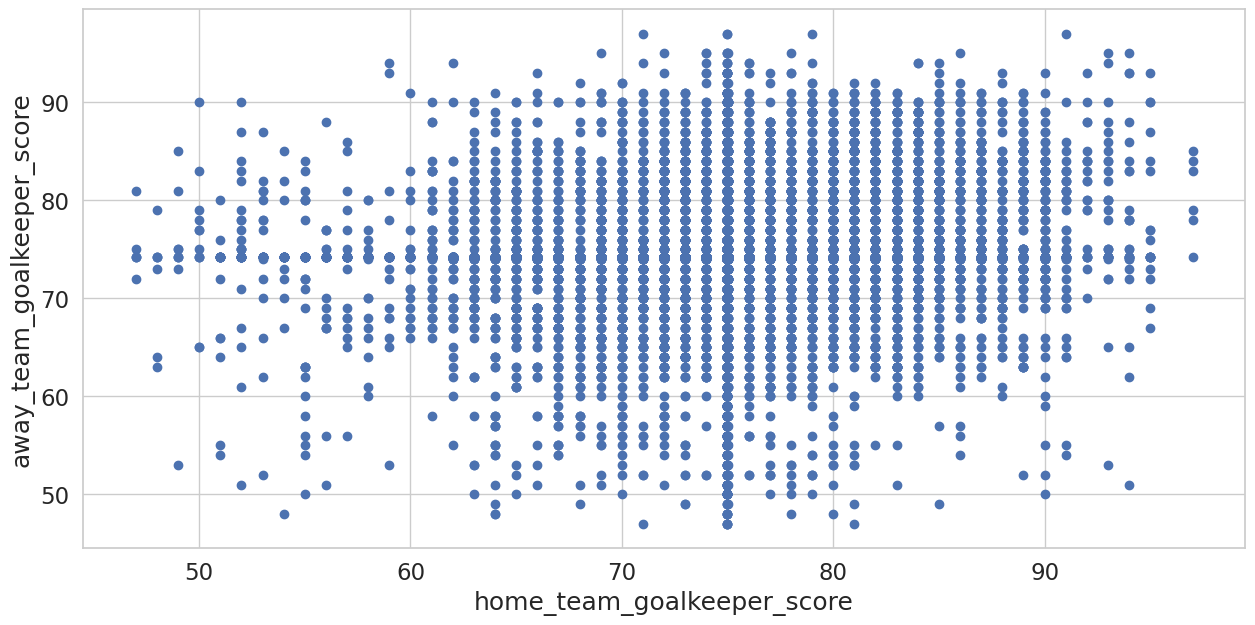

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['home_team_goalkeeper_score'], dataset['away_team_goalkeeper_score'])
 
# x-axis label
ax.set_xlabel('home_team_goalkeeper_score')
 
# y-axis label
ax.set_ylabel('away_team_goalkeeper_score')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['home_team_goalkeeper_score'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['home_team_goalkeeper_score'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (15542, 19)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['home_team_goalkeeper_score'] > upper].index
outliers_lower = dataset[dataset['home_team_goalkeeper_score'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (15542, 19)


<ipython-input-38-212d047ac073>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['away_team_goalkeeper_score'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['away_team_goalkeeper_score'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (15542, 19)


displays the amount of data before cleaning the outliers are obtained

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['away_team_goalkeeper_score'] > upper].index
outliers_lower = dataset[dataset['away_team_goalkeeper_score'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (13226, 19)


<ipython-input-40-e5b3c703a79e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


displays the data using a boxplot whether the data has been cleaned of outliers and the cleaned data has no outliers

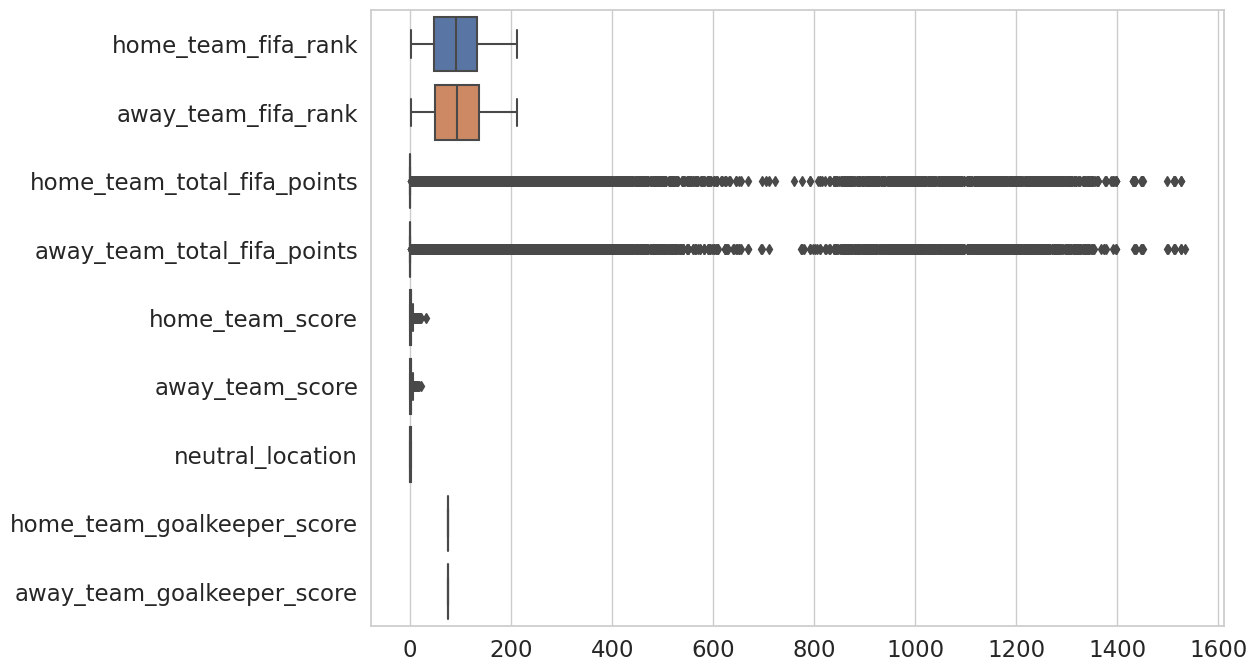

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

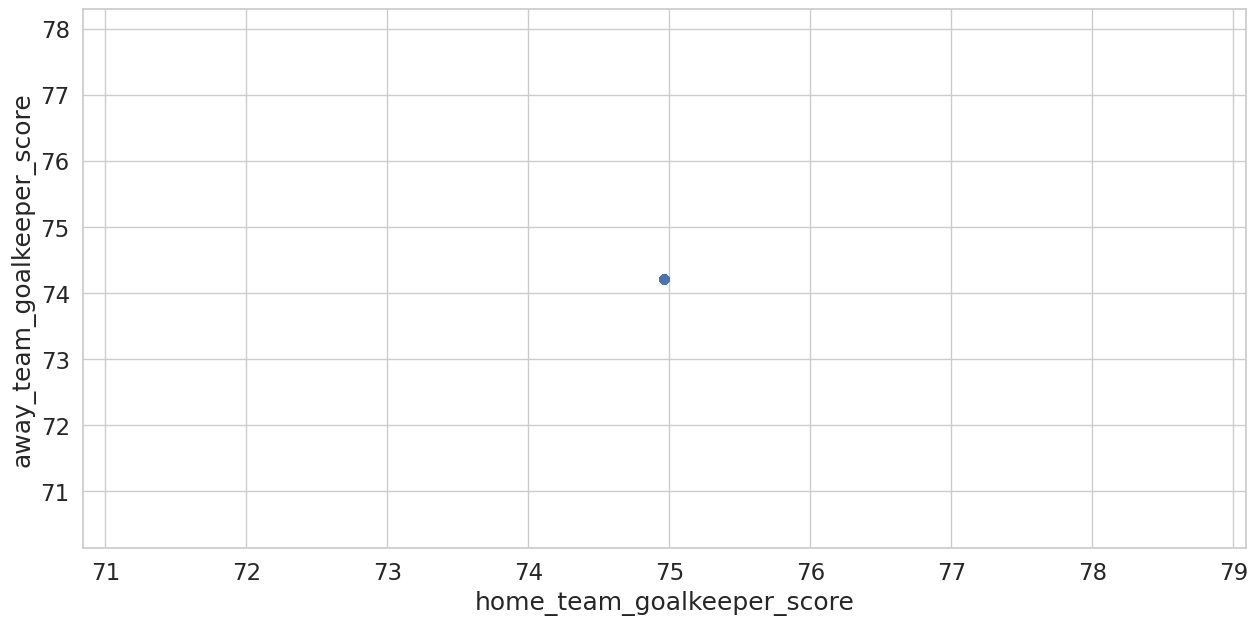

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['home_team_goalkeeper_score'], dataset['away_team_goalkeeper_score'])
 
# x-axis label
ax.set_xlabel('home_team_goalkeeper_score')
 
# y-axis label
ax.set_ylabel('away_team_goalkeeper_score')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

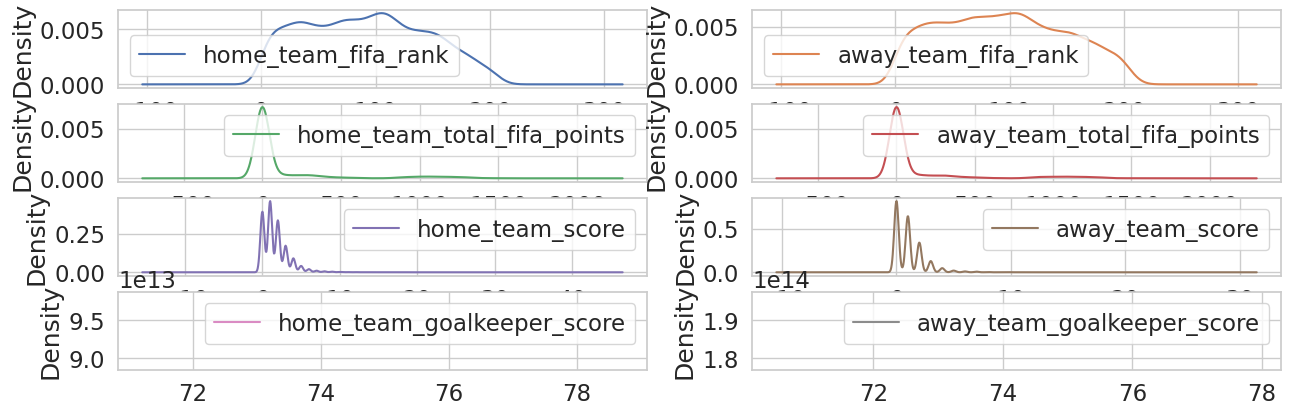

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

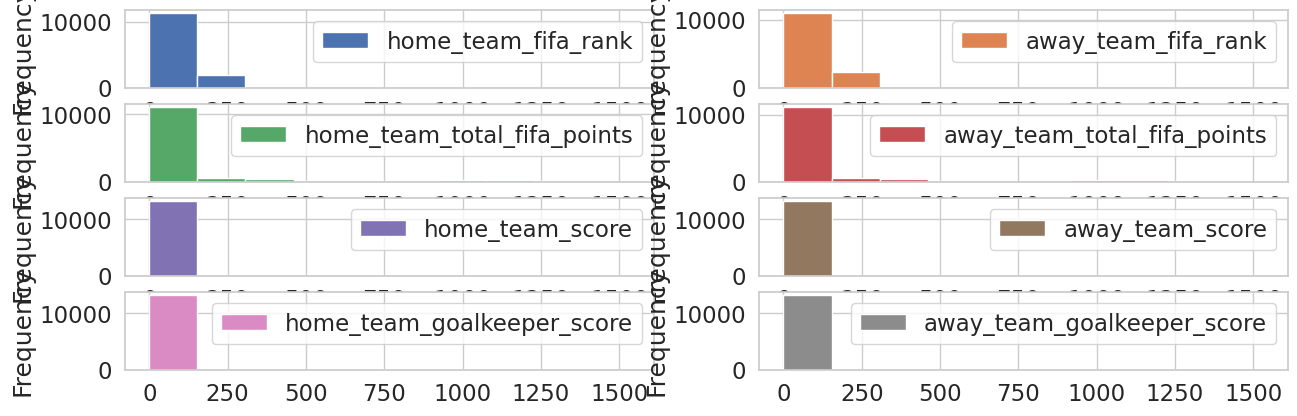

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

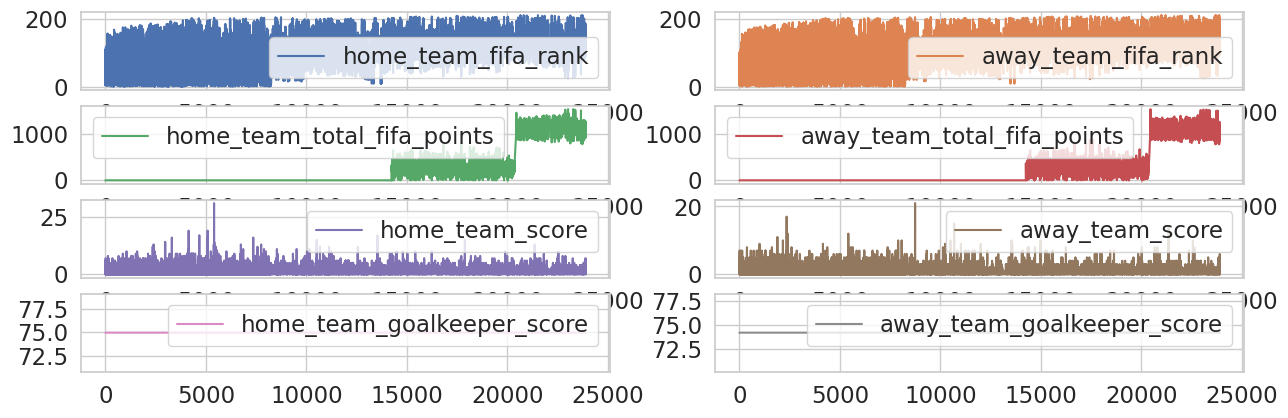

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

TypeError: ignored

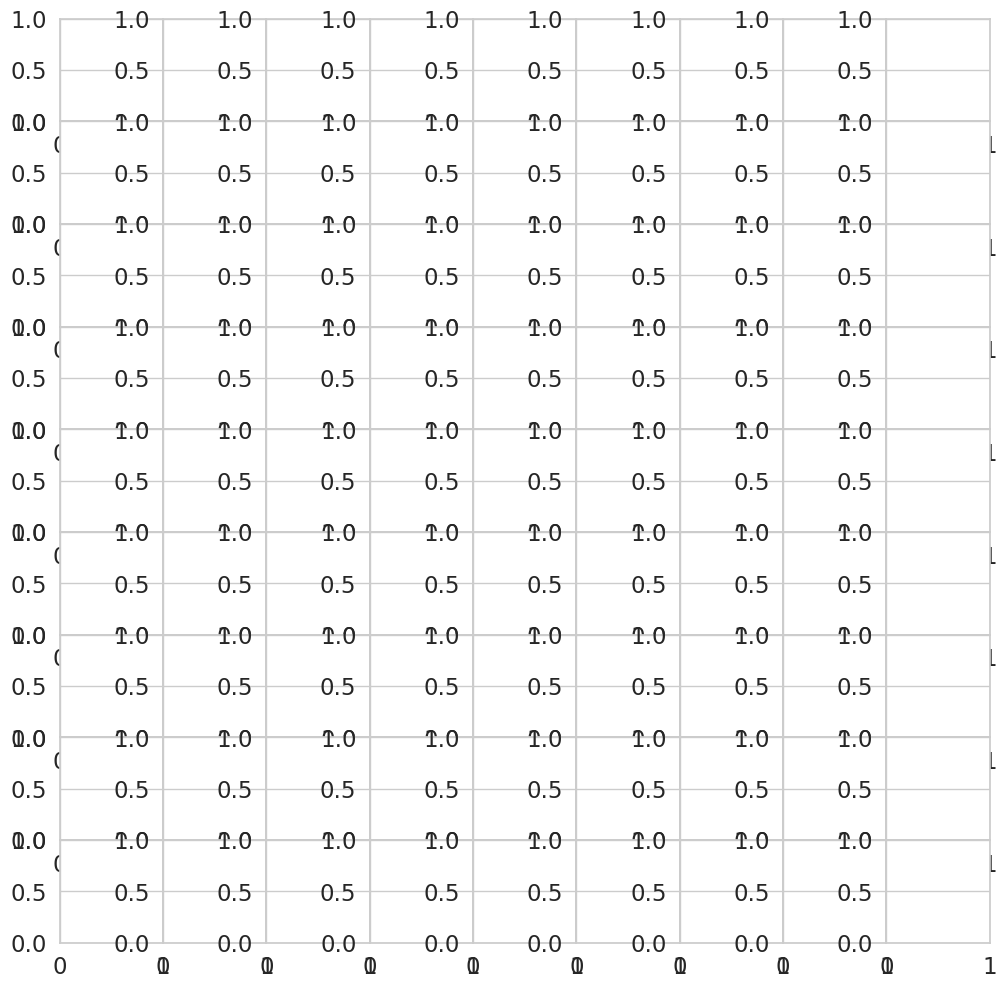

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-49-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


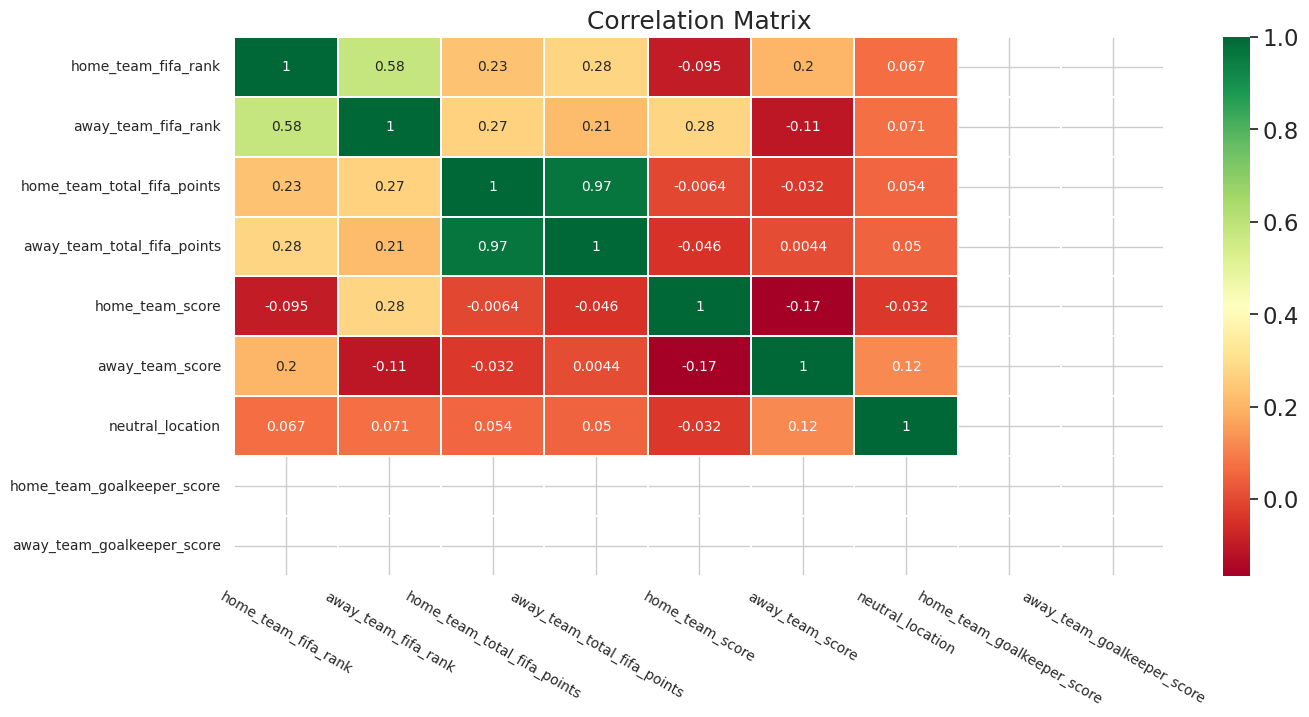

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [ ]:
x = dataset.drop('shoot_out', axis=1)
x

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,Win,74.963838,74.212477
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,Draw,74.963838,74.212477
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,Win,74.963838,74.212477
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,Win,74.963838,74.212477
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,Lose,74.963838,74.212477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23897,2022-06-14,Afghanistan,Cambodia,Asia,Asia,150,171,1049,966,2,2,AFC Asian Cup qualification,Kolkota,India,True,Draw,74.963838,74.212477
23899,2022-06-14,Bahrain,Turkmenistan,Asia,Asia,89,134,1262,1117,1,0,AFC Asian Cup qualification,Kuala Lumpur,Malaysia,True,Win,74.963838,74.212477
23900,2022-06-14,Malaysia,Bangladesh,Asia,Asia,154,188,1035,903,4,1,AFC Asian Cup qualification,Kuala Lumpur,Malaysia,False,Win,74.963838,74.212477
23901,2022-06-14,Myanmar,Singapore,Asia,Asia,152,158,1044,1012,2,6,AFC Asian Cup qualification,Bishkek,Kyrgyz Republic,True,Lose,74.963838,74.212477


Choose feature Type as a label

In [ ]:
y = dataset["shoot_out"]
y

0        No
1        No
2        No
3        No
4        No
         ..
23897    No
23899    No
23900    No
23901    No
23902    No
Name: shoot_out, Length: 13226, dtype: object

In [ ]:
y.values.reshape(-1,1)

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,home_team_goalkeeper_score,away_team_goalkeeper_score,date_1993-08-08,...,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe,home_team_result_Draw,home_team_result_Lose,home_team_result_Win
0,59,22,0,0,3,1,False,74.963838,74.212477,1,...,0,0,0,0,0,0,0,0,0,1
1,8,14,0,0,1,1,False,74.963838,74.212477,1,...,0,0,0,0,0,0,0,1,0,0
2,35,94,0,0,5,0,False,74.963838,74.212477,1,...,0,0,0,0,0,0,0,0,0,1
3,65,86,0,0,1,0,False,74.963838,74.212477,1,...,0,0,0,0,0,0,0,0,0,1
4,67,5,0,0,1,3,False,74.963838,74.212477,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23897,150,171,1049,966,2,2,True,74.963838,74.212477,0,...,0,0,0,0,0,0,0,1,0,0
23899,89,134,1262,1117,1,0,True,74.963838,74.212477,0,...,0,0,0,0,0,0,0,0,0,1
23900,154,188,1035,903,4,1,False,74.963838,74.212477,0,...,0,0,0,0,0,0,0,0,0,1
23901,152,158,1044,1012,2,6,True,74.963838,74.212477,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x.shape

(13226, 6547)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,6537,6538,6539,6540,6541,6542,6543,6544,6545,6546
0,-0.613898,-1.332813,-0.382743,-0.380312,0.771216,-0.056270,-0.600699,0.0,0.0,43.456053,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,-0.613996,0.995173
1,-1.575638,-1.479949,-0.382743,-0.380312,-0.389799,-0.056270,-0.600699,0.0,0.0,43.456053,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,1.862322,-0.613996,-1.004851
2,-1.066481,-0.008586,-0.382743,-0.380312,1.932230,-0.821142,-0.600699,0.0,0.0,43.456053,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,-0.613996,0.995173
3,-0.500752,-0.155722,-0.382743,-0.380312,-0.389799,-0.821142,-0.600699,0.0,0.0,43.456053,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,-0.613996,0.995173
4,-0.463037,-1.645478,-0.382743,-0.380312,-0.389799,1.473475,-0.600699,0.0,0.0,43.456053,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,1.628675,-1.004851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13221,1.102146,1.407602,3.127657,2.872060,0.190708,0.708603,1.664727,0.0,0.0,-0.023012,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,1.862322,-0.613996,-1.004851
13222,-0.048169,0.727096,3.840446,3.380454,-0.389799,-0.821142,1.664727,0.0,0.0,-0.023012,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,-0.613996,0.995173
13223,1.177577,1.720267,3.080807,2.659949,1.351723,-0.056270,-0.600699,0.0,0.0,-0.023012,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,-0.613996,0.995173
13224,1.139862,1.168506,3.110925,3.026935,0.190708,3.768091,1.664727,0.0,0.0,-0.023012,...,-0.04847,-0.062826,-0.094065,-0.050767,-0.062826,-0.091998,-0.090311,-0.536964,1.628675,-1.004851


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,6537,6538,6539,6540,6541,6542,6543,6544,6545,6546
0,0.276190,0.100000,0.000000,0.000000,0.096774,0.047619,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.033333,0.061905,0.000000,0.000000,0.032258,0.047619,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.161905,0.442857,0.000000,0.000000,0.161290,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.304762,0.404762,0.000000,0.000000,0.032258,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.314286,0.019048,0.000000,0.000000,0.032258,0.142857,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13221,0.709524,0.809524,0.687418,0.629726,0.064516,0.095238,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13222,0.419048,0.633333,0.826999,0.728162,0.032258,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13223,0.728571,0.890476,0.678244,0.588657,0.129032,0.047619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13224,0.719048,0.747619,0.684142,0.659713,0.064516,0.285714,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'No': 10427, 'Yes': 153})
Test distribution Counter({'No': 2608, 'Yes': 38})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.985161 (0.004689)


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9856386999244142


[[2608    0]
 [  38    0]]


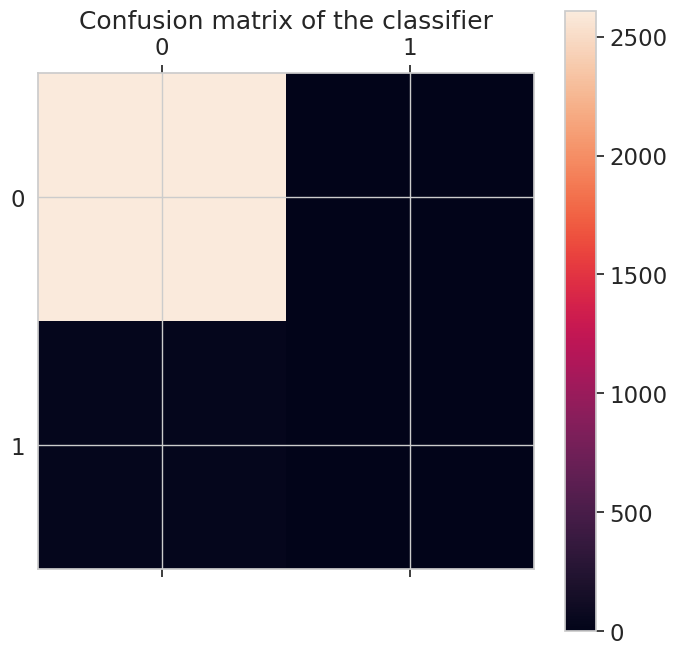

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99      2608
         Yes       0.00      0.00      0.00        38

    accuracy                           0.99      2646
   macro avg       0.49      0.50      0.50      2646
weighted avg       0.97      0.99      0.98      2646



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
